# Taller 2: Métricas de Desempeño
---

Este taller busca evaluar conceptos de modelamiento y la implementación de métricas de desempeño para la evaluación de modelos de Machine Learning supervisados.

- **Fecha de entrega**: 23 de Abril de 2023
- **Enlace de entrega**: https://forms.gle/cZDfJHdUn3PjM3KD6

Librerías:

<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Juan Lara.
<br>
<i><b>Asignatura:</b></i> Metricas de desempeño.
<br>
<i><b>Estudiante:</b></i> Steven Sebastian Florido Paez.
<br>
<i><b>Estudiante:</b></i> Luis Angel Rodriguez Calderon.
<br>
<i><b>Estudiante:</b></i> Carlos Andres Rojas Rocha.
<br>
<i><b>Tema:</b></i> Parcial corte 2.
<br>
<i><b>23 Abril 2023 </b></i>
</FONT>
</div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy.typing import ArrayLike
from typing import Tuple
from IPython.display import display
import seaborn as sns
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score
from scipy.special import expit as sigmoid
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## **1. Carga de Datos**
---

En este caso trabajáremos con el conjunto de datos [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv) de Kaggle, vamos a descargarlo:

In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1djX2CPMY-O_vskg9ey326auY8Yho415v' -O heart_failure.zip
!unzip heart_failure.zip

--2023-04-17 13:29:32--  https://drive.google.com/uc?export=view&id=1djX2CPMY-O_vskg9ey326auY8Yho415v
Resolving drive.google.com (drive.google.com)... 142.251.107.102, 142.251.107.113, 142.251.107.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4tm1vfl29sl2rff98v8fvu8n80u77at3/1681738125000/16848862265445619282/*/1djX2CPMY-O_vskg9ey326auY8Yho415v?e=view&uuid=c0927eb1-3303-4fdf-9ba4-1f4df9b9be89 [following]
--2023-04-17 13:29:33--  https://doc-10-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4tm1vfl29sl2rff98v8fvu8n80u77at3/1681738125000/16848862265445619282/*/1djX2CPMY-O_vskg9ey326auY8Yho415v?e=view&uuid=c0927eb1-3303-4fdf-9ba4-1f4df9b9be89
Resolving doc-10-4g-docs.googleusercontent.com (doc-10-4g-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400

Cargamos el conjunto de datos:

In [ ]:
data = pd.read_csv("heart.csv")
display(data.head())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
num_columnas = data.shape[1]
print("El dataset tiene ", num_columnas, " columnas.")

El dataset tiene  14  columnas.


## **2. Análisis Exploratorio**
---

En este punto deberá explorar y entender el conjunto de datos y sus elementos.

- ¿Cuántas columnas tiene el conjunto de datos, qué significa cada una?

**El conjunto de datos posee 14 columnas:**

**1.   Age: La edad de cada persona**

**2.   Sex: El genero de cada persona(1 = masculino, 0 = femenino)**

**3.   CP: Nivel de pericarditis constrictiva(del 1 al 4)**

**4.   Trtbps: Presión artertial en reposo**

**5.   Chol: Nivel de colesterol**

**6.   Fbs: Si tiene(1) o no tiene(0) azucar en la sangre en ayunas**

**7.   Restecg: Nivel de electrocardiográfica del paciente en reposo(del 0 al 2)**

**8.   Thalachh: Frecuancia cardiaca maxima**

**9.   Exng: Si tiene(1) o no(0) angina inducida**

**10.  OldPeak: Depresion del segmento ST(Electrocardiograma)**

**11.  Slp: Inclinacion del segmento ST de ejercicio(del 1 al 3)**

**12.  Caa: Numero de vasos principales obstruidos**

**13.  Thall: Transtorno sanguineo**

**14.  Output: Si tiene(1) o no(0) una enfermedad cardiaca**



Implemente una función que permita determinar si una columna es continúa o categórica (puede guiarse por el número de elementos únicos que tenga cada columna):

In [ ]:
def continuous_or_categoric(data: pd.DataFrame, column: str, unique_threshold: int = 10) -> bool:
    """
    Esta función valida si una columna contiene números continuos o categóricos.

    Parameters
    ----------
    data : pd.DataFrame
        Conjunto de datos.
    column : str
        Nombre de la columna a seleccionar.

    Returns
    -------
    is_continuous : bool
        Indica si la variable es continua o categórica.
    """
    # INGRESE SU CÓDIGO ACÁ
    unique_count = data[column].nunique()
    is_continuous = unique_count > unique_threshold
    return is_continuous

Use la siguiente celda para probar su código (puede cambiar el nombre de la variable).

In [ ]:
display(continuous_or_categoric(data, "age"))

True

- ¿Cómo es la distribución de las columnas?

Para esto debe implementar la función `show_distribution` la cual debe graficar un diagrama de tipo [kernel density estimation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) para las variables continuas y un diagrama de barras para las variables categóricas:

In [ ]:
def show_distribution(data: pd.DataFrame, column: str, plot_color: str = "orange") -> plt.Figure:
    """
    Esta función permite visualizar la distribución de cualquier columna del conjunto de datos.

    Parameters
    ----------
    data : pd.DataFrame
        Conjunto de datos.
    column : str
        columna a analizar.

    Returns
    -------
    fig : plt.Figure
        Figura de matplotlib.
    """
    # INGRESE SU CÓDIGO ACÁ
    if continuous_or_categoric(data, column):
        fig, ax = plt.subplots()
        sns.kdeplot(data[column], ax=ax, color=plot_color)
        ax.set_title(f"Distribucion {column}")
    else:
        fig, ax = plt.subplots()
        sns.countplot(data[column], ax=ax, color=plot_color)
        ax.set_title(f"Distribucion {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Frecuencia")
    return fig

Utilice la siguiente celda para probar su código:

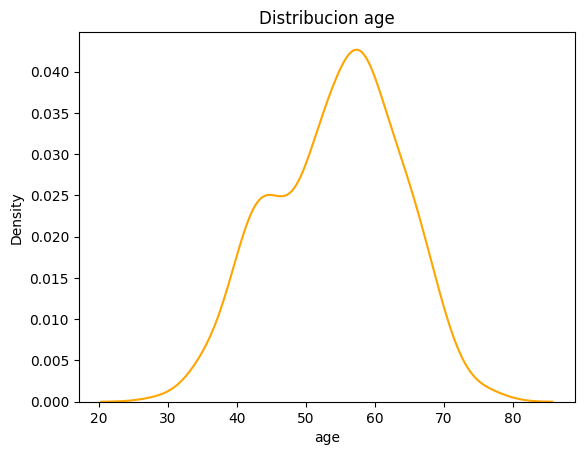

In [ ]:
fig = show_distribution(data, "age")
fig.show()

- ¿Cuáles son las variables independientes y cuál es la variable dependiente?

Para esto debe implementar la función `target_variable` la cual debe separar las columnas que se tomarán como variables independientes de la columna objetivo.

In [ ]:
def target_variable(data: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Esta función permite seleccionar las columnas independientes y la dependiente.

    Parameters
    ----------
    data : pd.DataFrame
        Conjunto de datos.

    Returns
    -------
    features : pd.DataFrame
        Variables independientes.
    labels : pd.Series
        Variable dependiente.
    """
    # INGRESE SU CÓDIGO ACÁ
    labels = data.iloc[:, -1]
    features = data.drop(columns=labels.name)
    return features, labels

Utilice la siguiente celda para probar su código:

In [ ]:
features, labels = target_variable(data)

In [ ]:
print("Variable independientes\n",features.head())
print("--------------------------------------------------------------------------")
print("Variable dependientes\n",labels.head())

Variable independientes
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  
--------------------------------------------------------------------------
Variable dependientes
 0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64


## **3. Preprocesamiento**
---

En este punto debe implementar una función para preprocesar el conjunto de datos. debe aplicar una transformación de tipo `min_max` sobre los datos (cada columna debe estar entre 0 y 1):

$$
x_{minmax} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
$$

Puede utilizar la clase `MinMaxScaler` de `sklearn`. Adicionalmente, debe convertir las etiquetas a un arreglo de `numpy`.

In [ ]:
def preprocess(features: pd.DataFrame, labels: pd.Series) -> Tuple[ArrayLike, ArrayLike]:
    """
    Esta función permite preprocesar el conjunto de datos.

    Parameters
    ----------
    features : pd.DataFrame
        Variables independientes.
    labels : pd.Series
        Variable dependiente.

    Returns
    -------
    features_p : ArrayLike
        Variables independientes preprocesadas.
    labels_p : ArrayLike
        Variable dependiente preprocesada.
    """
    # INGRESE SU CÓDIGO ACÁ
    scaler = MinMaxScaler()
    features_p = scaler.fit_transform(features)

    labels_p = labels.values

    return features_p, labels_p

Utilice la siguiente celda para probar su código:

In [ ]:
features_p, labels_p = preprocess(features, labels)

In [ ]:
print("Variables independientes:\n", features_p)
print("Variables dependientes:\n", labels_p)

Variables independientes:
 [[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         0.66666667 ... 0.         0.         0.66666667]
 [0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.8125     1.         0.         ... 0.5        0.5        1.        ]
 [0.58333333 1.         0.         ... 0.5        0.25       1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.25       0.66666667]]
Variables dependientes:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## **4. Modelamiento**
---

Para entrenar el modelo, dividimos el conjunto de datos en las particiones de entrenamiento y prueba:

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(
        features_p, labels_p, stratify=labels_p, test_size=0.3
        )

Para el modelo necesitamos optimizar una función de pérdida conocida como la entropía binaria cruzada':

$$
\mathcal{L} = - \frac{1}{N} \sum_{i=1} ^ N y_i \log{\tilde{y}_i} + (1 - y_i) \log{(1 - \tilde{y}_i)}
$$

Debe implementar esta función:

In [ ]:
def binary_crossentropy(y: ArrayLike, y_pred: ArrayLike) -> ArrayLike:
    """
    Esta función implementa la entropía binaria cruzada.

    Parameters
    ----------
    y : ArrayLike
        Etiquetas del conjunto de datos.
    y_pred : ArrayLike
        Predicciones de un modelo.

    Returns
    -------
    value : ArrayLike
        Valor de la pérdida.
    """
    # INGRESE SU CÓDIGO ACÁ
    epsilon = 1e-7
    value = -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    return value

Utilice las siguientes celdas para probar su código:

In [ ]:
y = np.array([0., 0])
y_pred = np.array([0.01, 0.01])
# Debe dar un valor bajo al ser valores parecidos
print(binary_crossentropy(y, y_pred))

0.010050234843405595


In [ ]:
y = np.array([1., 1.])
y_pred = np.array([0.99, 0.99])
# Debe dar un valor bajo al ser valores parecidos
print(binary_crossentropy(y, y_pred))

0.010050234843405595


In [ ]:
y = np.array([0., 0.])
y_pred = np.array([0.99, 0.99])
# Debe dar un valor alto al ser valores distintos
print(binary_crossentropy(y, y_pred))

4.60516018603809


In [ ]:
y = np.array([1., 1.])
y_pred = np.array([0.01, 0.01])
# Debe dar un valor alto al ser valores distintos
print(binary_crossentropy(y, y_pred))

4.605160186038091


Ahora, debe implementar un modelo de regresión logistica:

$$
\tilde{\mathbf{y}} = \frac{1}{1 + e^{\mathbf{X}\cdot\mathbf{w}}}
$$

Donde $\mathbf{X}$ corresponde a la matriz de características de entrenamiento, $\mathbf{w}$ es el vector de parámetros y $\tilde{\mathbf{y}}$ es la estimación del modelo.

> **Nota**: recuerde agregar una columna de unos para considerar el intercepto. El entrenamiento del modelo debe realizarse optimizando la entropía binaria cruzada, puede utilizar la función `optimize` de `scipy` para esto.

In [ ]:
class LogisticRegression(BaseEstimator, ClassifierMixin):
    """
    Implementación del modelo de regresión logística.
    """
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))


    def __init__(self, C=1.0, max_iter=100, tol=1e-4):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol


    def fit(self, X: ArrayLike, y: ArrayLike) -> "LogisticRegression":
        """
        Este método permite entrenar el modelo.

        Parameters
        ----------
        X : ArrayLike
            Variables independientes.
        y : ArrayLike
            Variable dependiente.

        Returns
        -------
        self : LogisticRegression
            Referencia al objeto.
        """
        # INGRESE SU CÓDIGO AQUÍ
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        def loss(w, X, y):
            y_pred = sigmoid(X.dot(w))
            return binary_crossentropy(y, y_pred) + (1 / (2 * self.C)) * w.dot(w)

        def grad(w, X, y):
            y_pred = sigmoid(X.dot(w))
            return X.T.dot(y_pred - y) + (1 / self.C) * w

        w0 = np.random.rand(X.shape[1])
        #w0 = np.zeros(X.shape[1])
        #dejara w0 en random
        #result = minimize(loss, w0, args=(X, y), method="L-BFGS-B", jac=grad, options={"maxiter": self.max_iter, "gtol": self.tol})
        result = minimize(loss, w0, args=(X, y), method="L-BFGS-B", options={"maxiter": self.max_iter, "gtol": self.tol})

        self.w_ = result.x
        return self


    def predict_proba(self, X: ArrayLike) -> ArrayLike:
        """
        Este método permite obtener las probabilidades de cada clase.

        Parameters
        ----------
        X : ArrayLike
            Variables independientes.

        Returns
        -------
        probs : ArrayLike
            Probabilidades de cada clase.
        """
        # INGRESE SU CÓDIGO AQUÍ
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        probs = sigmoid(X.dot(self.w_))
        probs = np.vstack([1 - probs, probs]).T
        return probs


    def predict(self, X: ArrayLike) -> ArrayLike:
        """
        Este método permite obtener las predicciones.

        Parameters
        ----------
        X : ArrayLike
            Variables independientes.

        Returns
        -------
        y_pred : ArrayLike
            Predicciones del modelo.
        """
        # INGRESE SU CÓDIGO AQUÍ
        probs = self.predict_proba(X)
        y_pred = np.argmax(probs, axis=1)
        return y_pred

Entrenamos el modelo:

In [ ]:
model = LogisticRegression().fit(features_train, labels_train)

## **5. Evaluación**
---

Obtenga las predicciones del modelo:

In [ ]:
y_pred = model.predict(features_test)

- ¿Cuánto da el accuracy del modelo?

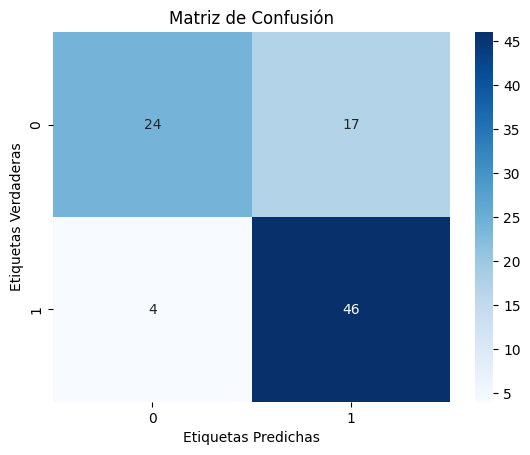

In [ ]:
confusion_mat = confusion_matrix(labels_test, y_pred)

sns.heatmap(confusion_mat, annot=True, cmap="Blues")

plt.title("Matriz de Confusión")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

In [ ]:
# INGRESE SU CÓDIGO AQUÍ
accuracy = accuracy_score(labels_test, y_pred)
print("Accuracy del modelo:", accuracy)

Accuracy del modelo: 0.7692307692307693


- ¿Cuánto da la precisión del modelo?

In [ ]:
# INGRESE SU CÓDIGO AQUÍ
precision = precision_score(labels_test, y_pred)
print("Precision del modelo:",precision)

Precision del modelo: 0.7301587301587301


- ¿Cuánto da el recall del modelo?

In [ ]:
# INGRESE SU CÓDIGO AQUÍ
recall = recall_score(labels_test, y_pred)
print("Recall del modelo:", recall)

Recall del modelo: 0.92


- ¿Cuánto da el f1 del modelo?

In [ ]:
# INGRESE SU CÓDIGO AQUÍ
f1 = f1_score(labels_test, y_pred)
print("F1 del modelo:", f1)

F1 del modelo: 0.8141592920353983


- ¿Qué puede concluir de las métricas y del modelo?

# **CONCLUSIONES**

* La exactitud (accuracy) del modelo es del 76.92%, lo que significa que el modelo clasificó correctamente el 76.92% de las instancias en el conjunto de pruebas.

*   La precisión del modelo es del 73.02%, lo que significa que de todas las instancias que el modelo ha clasificado como positivas, el 73.02% son realmente positivas.


* El recall del modelo es del 92.00%, lo que significa que de todas las instancias que son realmente positivas, el 92.00% han sido clasificadas correctamente por el modelo.


* La F1 score del modelo es del 81.42%, que es una medida que combina tanto la precisión como el recall en una sola métrica.




En general, parece que el modelo es bastante bueno en la identificación de instancias positivas, aunque aún hay margen de mejora. Sería útil hacer una evaluación adicional del modelo para determinar cómo se puede mejorar su rendimiento. También es importante tener en cuenta que la elección de métricas de evaluación depende del problema en cuestión y de los requisitos específicos del proyecto. Por lo tanto, se deben considerar cuidadosamente todas las métricas relevantes para el problema en cuestión antes de hacer conclusiones finales.